# Présentation de la recherche 

## Benchmarking et Analyse Expérimentale des Algorithmes et Modèles de l'IA

# PREMIERE ETAPE 

### ALGORITHME CMAES 

L'algorithme que nous avons choisi dans cette étape est ***CMA-ES (Covariance Matrix Adaptation Evolution Strategy).***

##### Qu'est ce que CMAES ?

CMA-ES est un algorithme d'optimisation évolutif basé sur une stratégie d'évolution. Il est particulièrement efficace pour résoudre des problèmes d'optimisation non linéaires, continus et sans gradient.
Il fonctionne comme suit : 
- Initialisation :
        L'algorithme commence avec une population initiale d'individus générés aléatoirement.
        Une distribution gaussienne est utilisée pour définir les solutions candidates.
- Évaluation et sélection :
        Chaque individu est évalué en fonction de la fonction objectif.
        Les meilleurs individus sont sélectionnés pour guider l'évolution.
- Adaptation de la covariance :
        Contrairement aux algorithmes évolutionnaires classiques, CMA-ES ajuste dynamiquement la matrice de covariance.
        Cela permet d'adapter la direction et l'amplitude des mutations en fonction de la topologie du paysage de la fonction.
- Nouvelle génération :
    De nouvelles solutions sont échantillonnées à partir de la distribution mise à jour.
    Le processus est répété jusqu'à convergence ou un critère d'arrêt prédéfini.

#### 5. Visualisation des résultats de l'exécutetion de CMA-ES sur un ensemble de données.

Le CMA-ES (Covariance Matrix Adaptation Evolution Strategy) est un algorithme d’optimisation stochastique, on remarque que chaque exécution (ou run) est différente à cause des éléments suivants :

- Initialisation aléatoire:
    CMA-ES commence avec une population initiale qui est choisie aléatoirement dans l’espace de recherche.
    Donc, chaque exécution part d’un point de départ différent, ce qui affecte le trajet de convergence.
- Mutation et recombinaison:
    Les individus (solutions candidates) sont générés avec des perturbations aléatoires.
    À chaque génération, de nouveaux candidats sont échantillonnés à partir d’une distribution gaussienne qui évolue au fil du temps.
    Cela signifie que même si on optimise la même fonction, les valeurs précises à chaque étape changent.
- Sélection et mise à jour de la distribution:

Même si les tendances globales sont similaires, les détails du chemin de convergence diffèrent d’une exécution à l’autre.

###### Affichage de chaque exécution du fichier f1 de dimension 1 dans une figure différente

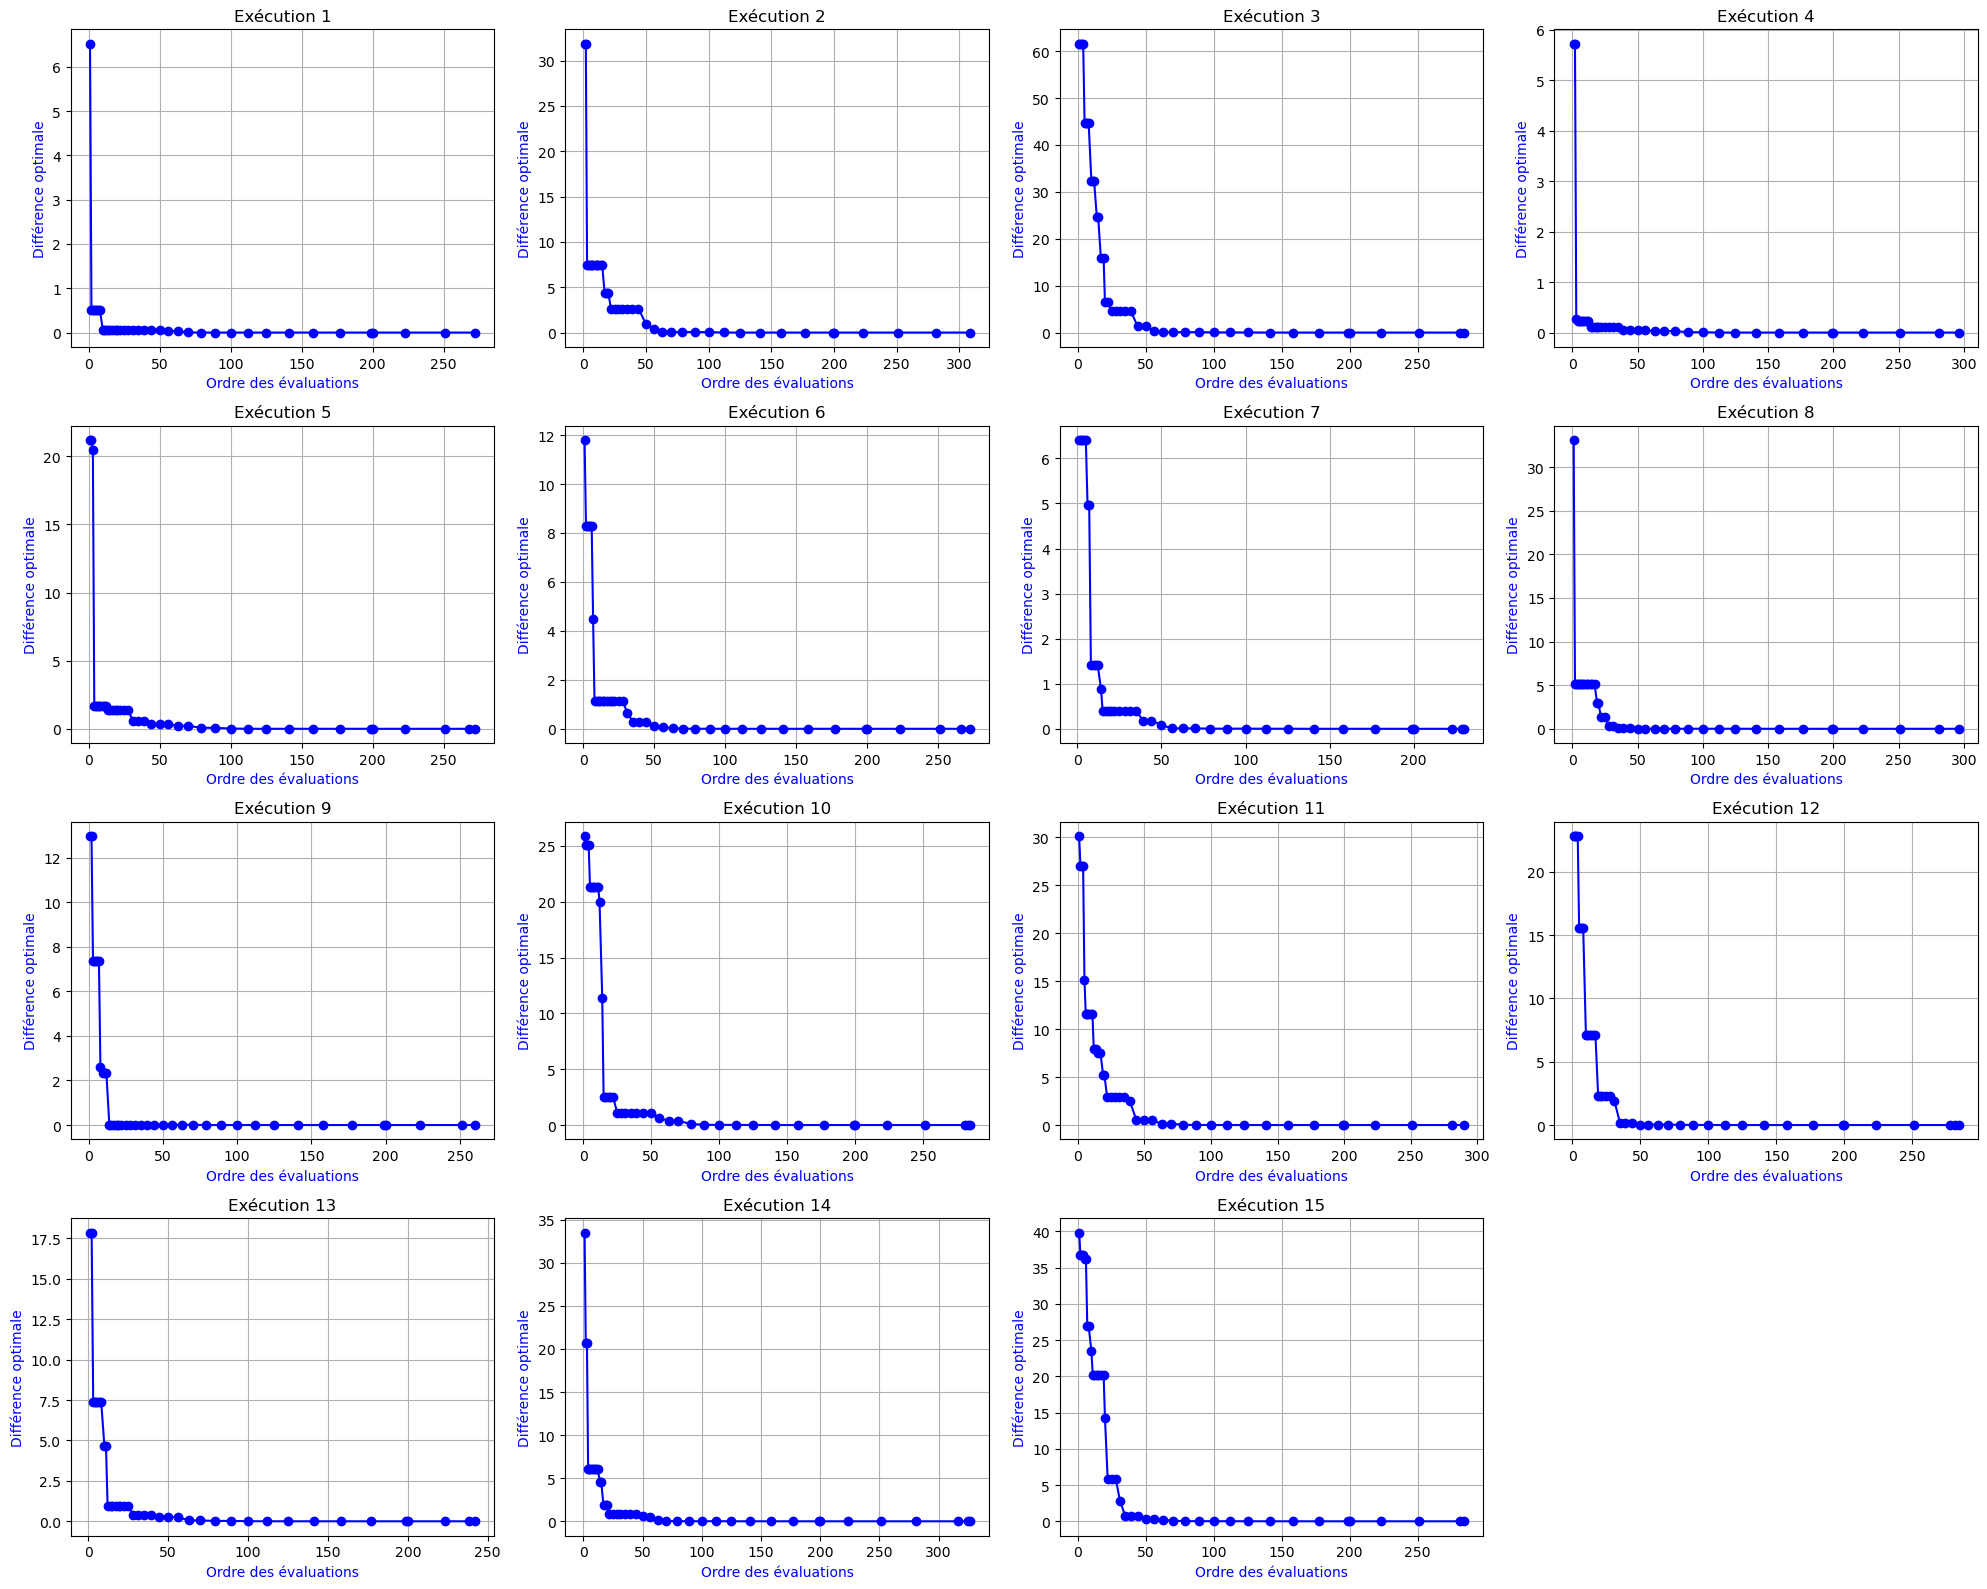

In [1]:
import matplotlib.pyplot as plt
import math


# with open("bbobexp_f1_DIM2.tdat", "r") as f:

def affichage_par_instances(fichier):
# Ouvrir le fichier .tdat
    with open(fichier, "r") as f:
        lignes = f.readlines()
    # Initialisation des listes pour stocker toutes les exécutions
    executions = []
    x, y = [], []
    debut = False

    # Lecture des lignes du fichier
    for ligne in lignes:
        ligne = ligne.strip()

        if ligne.startswith('% function evaluation | noise-free fitness'):
            debut = True  # Début de l'exécution
            if x and y:
                executions.append((x, y))
                x, y = [], []  # Réinitialisation des listes

        elif debut and ligne and not ligne.startswith('%'):
            valeurs = ligne.split()
            x.append(int(valeurs[0]))  # Ordre des évaluations
            y.append(float(valeurs[2]))  # Meilleure différence

    # Ajouter la dernière exécution si elle n'a pas été ajoutée
    if x and y:
        executions.append((x, y))

    # Détermination des dimensions de la grille
    n = len(executions)
    cols = math.ceil(math.sqrt(n))  # Nombre de colonnes (optimisé)
    rows = math.ceil(n / cols)  # Nombre de lignes

    # Création de la figure et des sous-graphiques
    fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4))
    axes = axes.flatten()  # Transformation en liste pour accès facile

    # Génération des graphiques
    for i, (x, y) in enumerate(executions):
        axes[i].plot(x, y, linestyle="-", marker="o", color="b")
        axes[i].set_xlabel("Ordre des évaluations", color="b")
        axes[i].set_ylabel("Différence optimale", color="b")
        axes[i].set_title(f"Exécution {i+1}")
        axes[i].grid()

    # Suppression des sous-graphiques vides (si le nombre d'exécutions < nb total de subplots)
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

    # Ajustement de l'espacement
    fig.tight_layout()
    plt.show()
    
    

affichage_par_instances("bbobexp_f1_DIM2.tdat")

###### Affichage de toutes les exécutions du fichier f1 de dimension 1 dans la même figure

On définit une fonction qui fait l'affichage des exécutions du fichier passé en paramétre

In [2]:
import matplotlib.pyplot as plt

def Affichage_fn(fichier):

    # Définition des couleurs (au cas où il y aurait plus de runs)
    couleurs = [
        "b", "g", "r", "c", "m", "y", "k", "orange", "purple", "brown",
        "pink", "lime", "teal", "navy", "gold"
    ]

    plt.figure(figsize=(10, 6))  # Une seule figure

    # Parcourir chaque fichier et récupérer les deux premiers runs
    couleur_index = 0  # Suivi des couleurs utilisées

    with open(fichier, "r") as f:
        lignes = f.readlines()

    runs = []  # Liste pour stocker les runs (x, y)
    x, y = [], []
    debut = False

    for ligne in lignes:
        ligne = ligne.strip()
        if ligne.startswith('% function evaluation | noise-free fitness'):
            if x and y:
                runs.append((x, y))  # Ajouter le run à la liste
            debut = True  # Début d'une nouvelle exécution
            x, y = [], []  # Réinitialisation des listes

        elif debut and ligne and not ligne.startswith('%'):
            valeurs = ligne.split()
            x.append(int(valeurs[0]))  # Ordre des évaluations
            y.append(float(valeurs[2]))  # Meilleure différence

    # Ajouter le dernier run s'il n'a pas été ajouté
    if x and y and len(runs) < 15:
        runs.append((x, y))

    # Affichage des runs sur la même figure
    for j, (x_vals, y_vals) in enumerate(runs):
        plt.plot(
            x_vals, y_vals, linestyle="-", marker="o",
            color=couleurs[couleur_index % len(couleurs)], 
            label=f"Run {j+1}"
        )
        couleur_index += 1  # Passer à la couleur suivante

    # Ajout des labels et titre
    plt.xlabel("Ordre des évaluations")
    plt.ylabel("Différence fonction sans bruit - optimale")
    plt.title("Affichage de toutes les exécutions du fichier f1")
    plt.legend()  # Affichage de la légende
    plt.grid(True)

    plt.show()


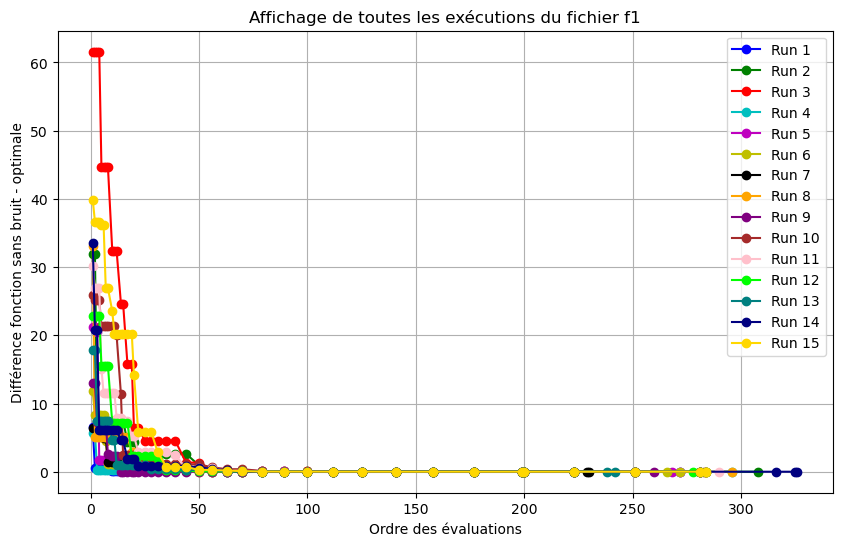

In [3]:
Affichage_fn("bbobexp_f1_DIM2.tdat")

Chaque fichier correspond à une fonction d’optimisation différente.Certaines fonctions ont un gradient clair et convergent rapidement , d'autres sont plus rugueuses avec des pièges locaux, rendant l’optimisation plus difficile.

###### Affichage de toutes les exécutions du fichier f2 de dimension 2 

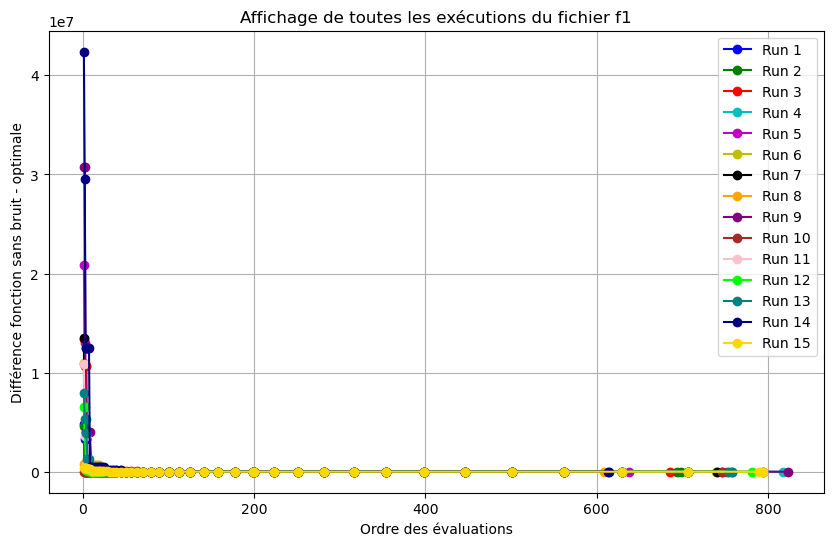

In [4]:
Affichage_fn("bbobexp_f2_DIM2.tdat")

#### 6. Choix d'une agrégation

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import os

def Agrégation_fn(fichier, ax):
    with open(fichier, "r") as f:
        lignes = f.readlines()

    runs = []  # Liste pour stocker les runs (x, y)
    x_vals_all, y_vals_all = [], []  
    debut = False

    for ligne in lignes:
        ligne = ligne.strip()
        if ligne.startswith('% function evaluation | noise-free fitness'):
            if x_vals_all and y_vals_all:
                runs.append((x_vals_all, y_vals_all))  
            debut = True  
            x_vals_all, y_vals_all = [], []  

        elif debut and ligne and not ligne.startswith('%'):
            valeurs = ligne.split()
            x_vals_all.append(int(valeurs[0]))  
            y_vals_all.append(float(valeurs[2]))  

    if x_vals_all and y_vals_all:
        runs.append((x_vals_all, y_vals_all))

    # Trouver la longueur minimale des runs pour aligner les données
    min_len = min(len(run[0]) for run in runs)
    x_common = runs[0][0][:min_len]  # On prend les x du premier run tronqués

    y_matrix = np.array([run[1][:min_len] for run in runs])  # Matrice des y

    # Calcul des statistiques descriptives
    y_mean = np.mean(y_matrix, axis=0)  # Moyenne
    y_std = np.std(y_matrix, axis=0)  # Écart-type

    # Affichage de la courbe moyenne avec une enveloppe
    ax.plot(x_common, y_mean, color="black", label="Moyenne des runs")
    ax.fill_between(x_common, y_mean - y_std, y_mean + y_std, color="r", alpha=0.2, label="Écart-type")

    ax.set_xscale("log")  # Échelle logarithmique sur l'axe X
    ax.set_xlabel("Ordre des évaluations (échelle log)")
    ax.set_ylabel("Différence fonction sans bruit - optimale")

    # Extraire uniquement le nom du fichier sans le chemin
    nom_fichier = os.path.basename(fichier)
    ax.set_title(f"Agrégation des runs - {nom_fichier}")

    ax.legend()
    ax.grid(True)


fonction d'affichage

In [28]:
def affichage_par_agregation(fichiers,rows,cols):
    fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4))

    # Convertir en tableau 1D pour un accès plus facile
    axes = np.array(axes).flatten()

    # Afficher les fichiers
    for i, fichier in enumerate(fichiers):
        Agrégation_fn(fichier, axes[i])

    # Supprimer les axes vides si le nombre de fichiers < nb total de cases
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()

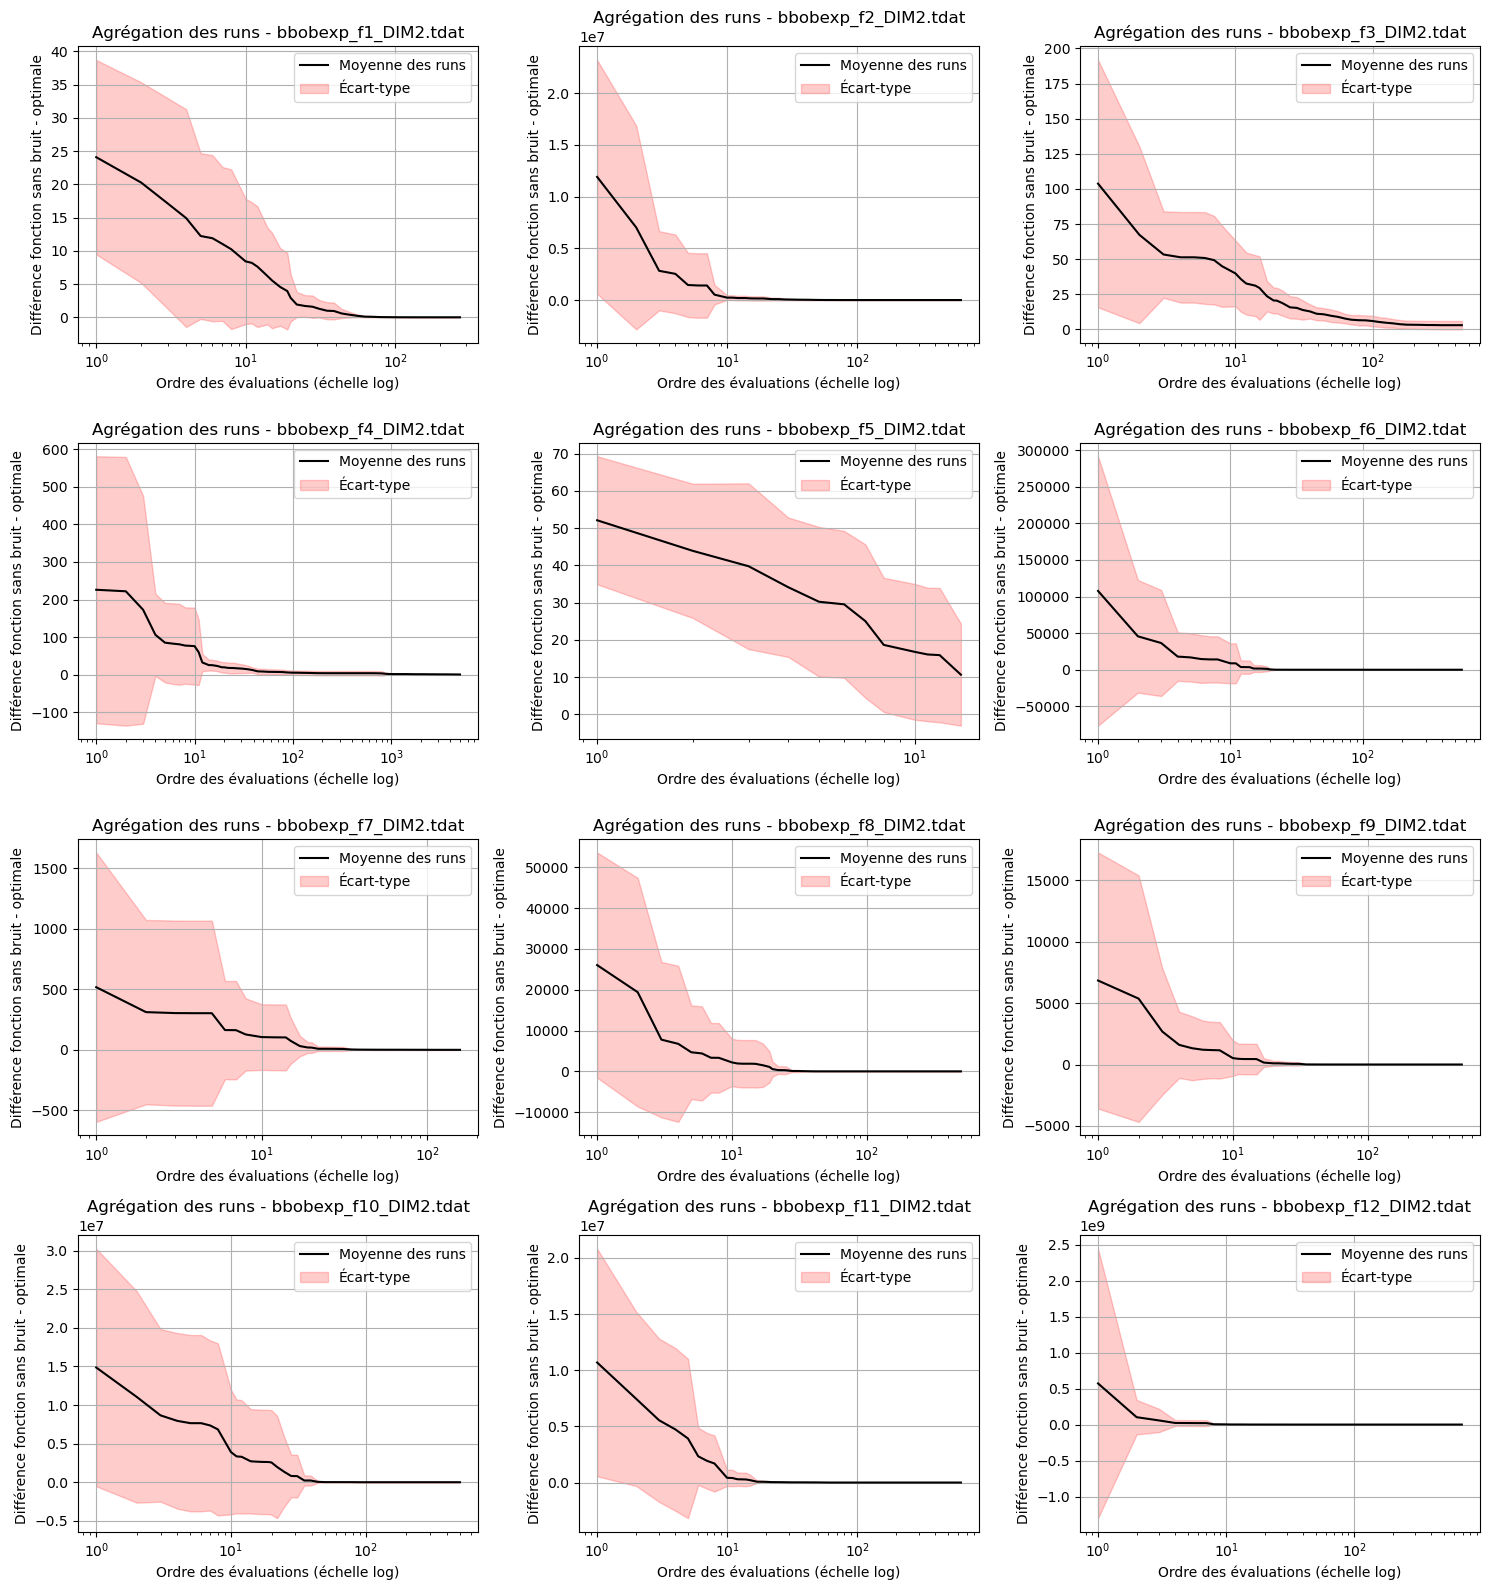

In [29]:
# Liste des fichiers (modifie selon tes besoins)
fichiers = [
    "bbobexp_f1_DIM2.tdat",
    "bbobexp_f2_DIM2.tdat",
    "bbobexp_f3_DIM2.tdat",
    "bbobexp_f4_DIM2.tdat",
    "bbobexp_f5_DIM2.tdat",
    "bbobexp_f6_DIM2.tdat",
    "bbobexp_f7_DIM2.tdat",
    "bbobexp_f8_DIM2.tdat",
    "bbobexp_f9_DIM2.tdat",
    "bbobexp_f10_DIM2.tdat",
    "bbobexp_f11_DIM2.tdat",
    "bbobexp_f12_DIM2.tdat"
]

# Déterminer la taille de la grille automatiquement
n = len(fichiers)
rows = int(np.ceil(n ** 0.5))  # Nombre de lignes
cols = int(np.ceil(n / rows))  # Nombre de colonnes

affichage_par_agregation(fichiers,rows,cols)

# DEUXIEME ETAPE 

###### Performance en fonction du type de la fonction

On a 5 types de fonctions on prendra une de chacun des types et on variera la dimension pour voir comment la performance de l'algorithme différe.
- Type : Seprable : f1-f5
- Type : Low or moderate conditionning : f6 - f9
- Type : High conditionning and unimodal : f10 - f14 
- Type : Multi-modal with adequate global structure : f15-f19
- Type : Mutli-modal with weak global structure : f20 - f24 

###### Type 1 : Fonction separable : f5 

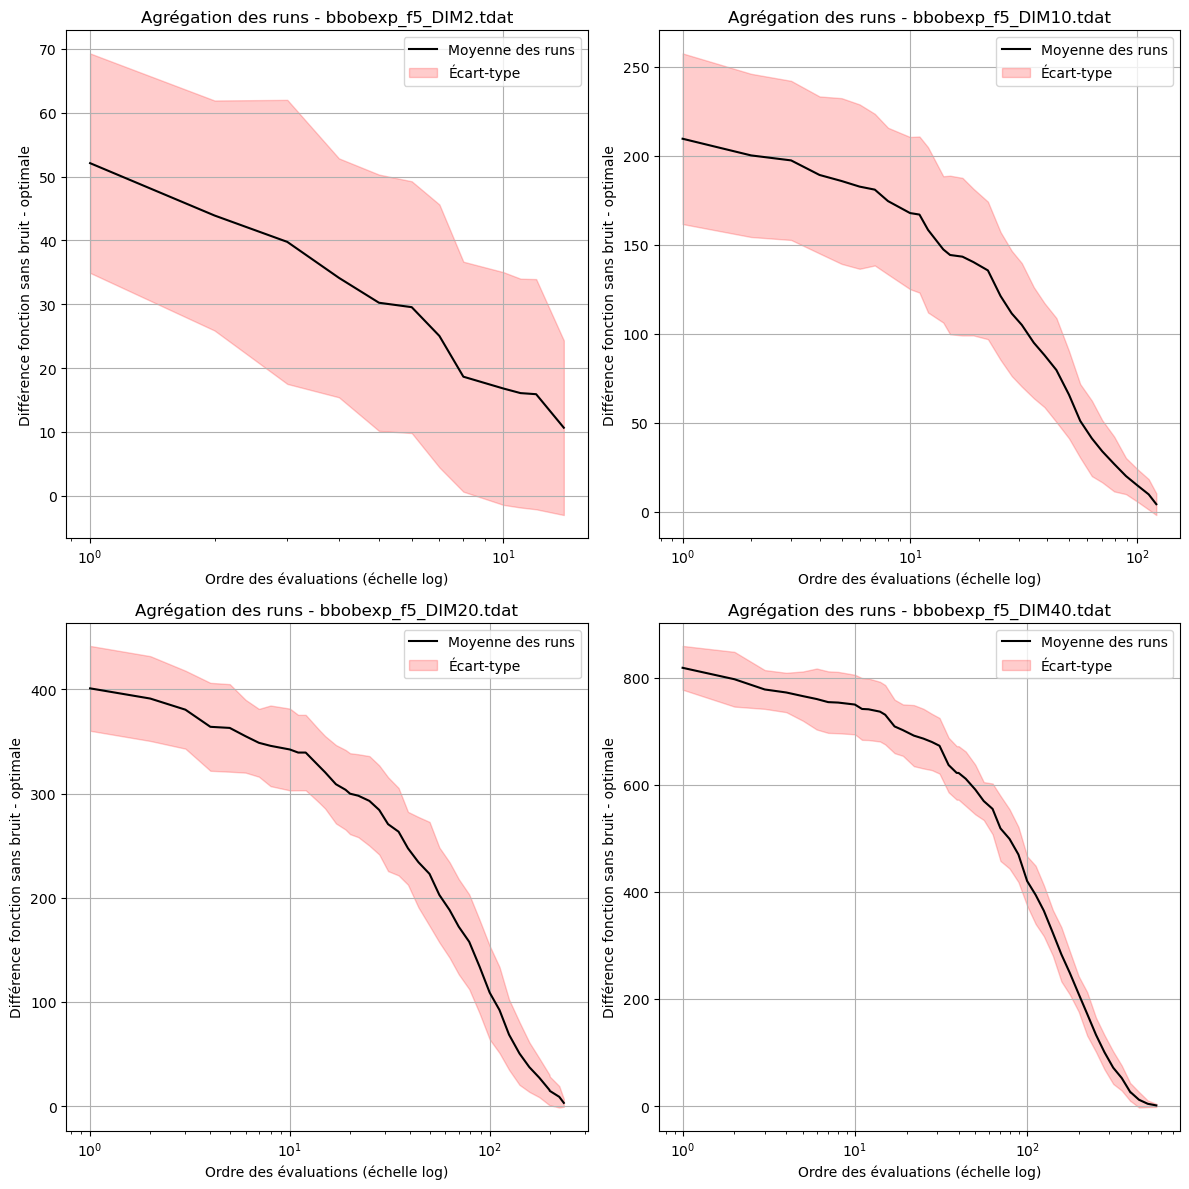

In [7]:
# Liste des fichiers (modifie selon tes besoins)
fichiers = [
    "data_f5/bbobexp_f5_DIM2.tdat",
    "data_f5/bbobexp_f5_DIM10.tdat",
    "data_f5/bbobexp_f5_DIM20.tdat",
    "data_f5/bbobexp_f5_DIM40.tdat"
]

# Déterminer la taille de la grille automatiquement
n = len(fichiers)
rows = int(np.ceil(n ** 0.5))  # Nombre de lignes
cols = int(np.ceil(n / rows))  # Nombre de colonnes

fig, axes = plt.subplots(rows, cols, figsize=(cols * 6, rows * 6))

# Convertir en tableau 1D pour un accès plus facile
axes = np.array(axes).flatten()

# Afficher les fichiers
for i, fichier in enumerate(fichiers):
    Agrégation_fn(fichier, axes[i])

# Supprimer les axes vides si le nombre de fichiers < nb total de cases
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()

### analyse de la representation


###### En dimension 2, nous avons un algorithme qui  montre une convergence rapide vers l’optimum, avec une erreur initiale relativement faible. La courbe nous montre une performance  qui diminue de manière régulière, indiquant une optimisation efficace. L’écart-type est présent au début, mais il diminue rapidement, ce qui signifie que les différentes exécutions de l’algorithme donnent des résultats similaires. Cette faible variabilité montre que la solution est robuste et stable. L’optimisation ne nécessite que quelques évaluations pour atteindre un bon niveau de performance. L’échelle logarithmique des évaluations met en évidence une rapide amélioration de la solution en très peu d’itérations. En dimension 10, l’algorithme parvient toujours à optimiser la fonction, mais là nous avons une  convergence  qui est plus progressive. L’erreur initiale est plus grande qu’en dimension 2, ce qui indique une difficulté "accrue" . La courbe descend de manière stable, bien que plus lentement, suggérant une convergence constante mais nécessitant plus d’évaluations. L’écart-type est plus marqué que pour la dimension 2, signifiant une plus grande variabilité entre les runs, surtout dans les premières évaluations. Dimension 20, A cette échelle, nous remarquons que l’algorithme fait face à une complexité accrue, avec une erreur initiale beaucoup plus élevée que dans les dimensions  précédentes. La courbe nous  montre une descente plus progressive, soulignant un besoin accru d’évaluations pour réduire l’écart avec l’optimum. L’écart-type est également plus important, surtout au début, suggérant une variabilité plus grande dans les performances des différents runs. Cela peut être dû à la difficulté croissante de trouver un bon chemin d’optimisation dans un espace plus grand. # En dimension 40, nous remarquons une optimisation nettement plus difficile.  Avec une erreur initiale  qui est la plus élevée de tous les cas, ce qui reflète la complexité croissante du problème. La convergence est plus lente, et bien que la courbe suive une descente régulière, elle nécessite beaucoup plus d’évaluations pour atteindre des valeurs proches de l’optimum. L’écart-type est présent sur toute la durée du processus, indiquant une variabilité importante dans les performances des différents runs. Cela est typique des problèmes en haute dimension où l’espace de recherche est beaucoup plus vaste, rendant plus difficile la localisation des solutions optimales. 
### Remarque
###### L’algorithme est le plus performant en en faible dimension comme la dimension 2 , où il converge rapidement avec une faible variabilité.  Donc plus la dimension augmente, plus l’optimisation devient difficile, nécessitant davantage d’évaluations et subissant une plus grande variabilité entre les runs. En haute dimension, l’efficacité est réduite en raison de la complexité croissante du problème.

###### Type 2 : Fonction Low or moderate conditionning : f8 : Rosenbrock original

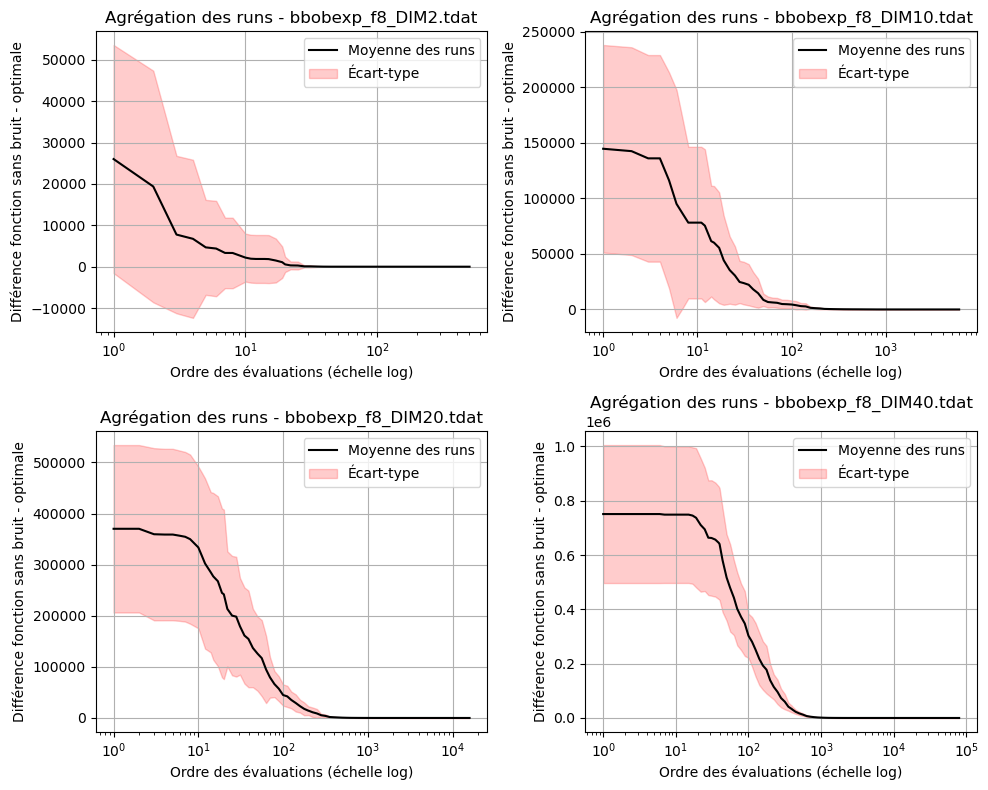

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Liste des fichiers (modifie selon tes besoins)
fichiers = [
    r"C:\Users\Hp\Desktop\Pres de la recherche\CMAES\data_f8\bbobexp_f8_DIM2.tdat",
    r"C:\Users\Hp\Desktop\Pres de la recherche\CMAES\data_f8\bbobexp_f8_DIM10.tdat",
    r"C:\Users\Hp\Desktop\Pres de la recherche\CMAES\data_f8\bbobexp_f8_DIM20.tdat",
    r"C:\Users\Hp\Desktop\Pres de la recherche\CMAES\data_f8\bbobexp_f8_DIM40.tdat",
]

# Déterminer la taille de la grille automatiquement
n = len(fichiers)
rows = int(np.ceil(n ** 0.5))  # Nombre de lignes
cols = int(np.ceil(n / rows))  # Nombre de colonnes

affichage_par_agregation(fichiers,rows,cols)

### Analyse détaillée par graphe  

###### ** En dimension 2** , L’algorithme converge rapidement vers l’optimum, bien que l’erreur initiale soit relativement élevée. La courbe montre une baisse rapide dans les premières évaluations, puis une stabilisation autour de **zéro**. L’écart-type est important au début, indiquant une forte variabilité entre les runs, mais il diminue avec le temps, ce qui signifie que l’optimisation devient plus stable. Certaines valeurs négatives en fin de courbe pourraient indiquer une surestimation de l’optimum. L’optimisation est donc efficace, bien que légèrement instable au départ. La convergence rapide est un bon signe pour les problèmes en faible dimension. L’algorithme parvient à obtenir des solutions précises avec un faible nombre d’évaluations.  ** En Dimension 10**,  nous avons une erreur initiale qui est beaucoup plus grande qu’en dimension 2, mais la courbe suit une descente régulière. L’algorithme nécessite donc plus d’évaluations pour atteindre une solution proche de l’optimum. en plus on constacte un écart-type qui est important au début, montrant une forte variabilité entre les runs, mais il se réduit progressivement. Cela signifie que les performances sont plus imprévisibles au départ mais deviennent plus cohérentes avec le temps. La convergence est plus lente que pour la dimension 2, ce qui est attendu en raison de la complexité accrue du problème. Toutefois, l’algorithme finit par atteindre de bonnes solutions après un nombre suffisant d’évaluations. La performance est correcte, mais demande plus de ressources qu’en basse dimension ** En Dimension 20** , L’erreur initiale est extrêmement élevée, ce qui montre que l’optimisation commence dans un espace de recherche très éloigné de l’optimum. La convergence est progressive mais nécessite beaucoup plus d’évaluations pour que la courbe descende de manière significative. L’écart-type est très large au début, indiquant une grande variabilité entre les runs, mais il diminue fortement lorsque l’algorithme commence à converger. L’optimisation est donc plus difficile et demande davantage d’itérations avant de produire des résultats fiables. Contrairement aux dimensions plus faibles, le processus est beaucoup plus long et l’optimisation devient plus imprévisible. Néanmoins, l’algorithme finit par atteindre une solution acceptable après un grand nombre d’évaluations.  **Dimension 40**,L’optimisation est la plus difficile ici, avec une erreur initiale extrêmement élevée et une convergence très lente. L’algorithme met beaucoup de temps avant de réduire significativement l’écart avec l’optimum. L’écart-type reste élevé sur une longue période, montrant une forte variabilité entre les runs, ce qui signifie que certains runs peuvent être bien plus performants que d’autres. L’optimisation devient plus stable uniquement après un très grand nombre d’évaluations. La convergence est beaucoup plus tardive que dans les autres dimensions, ce qui indique que l’algorithme lutte pour trouver une bonne solution dans cet espace plus vaste. La performance est donc nettement réduite en haute dimension.  

 #### **Remarque**
 ###### l'algorithme de dimension 2 est le plus performant  où nous avons une  convergence rapide avec peu d’évaluations et une faible variabilité. ET plus la  dimension est grande plus  l’optimisation devient de plus en plus complexe, nécessitant un nombre bien plus élevé d’évaluations avant d’obtenir une bonne solution.

##### Type 3 : Fonction High conditionning : f13 : Sharp ridge 

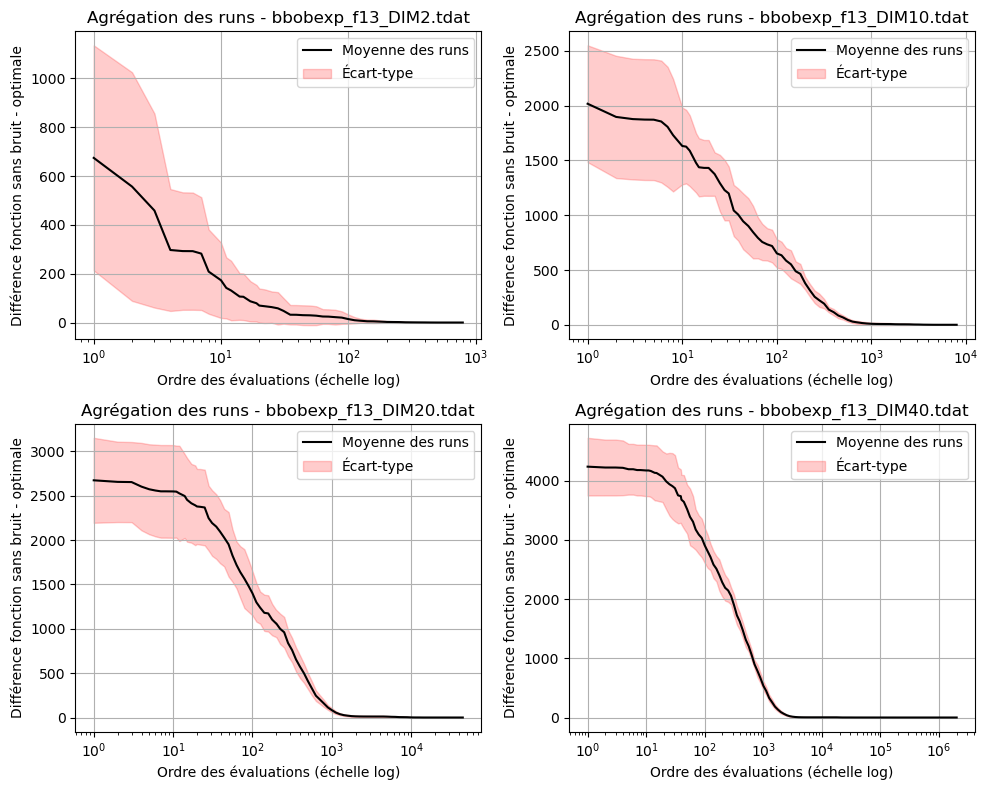

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Liste des fichiers (modifie selon tes besoins)
fichiers = [
    r"C:\Users\Hp\Desktop\Pres de la recherche\CMAES\data_f13\bbobexp_f13_DIM2.tdat",
    r"C:\Users\Hp\Desktop\Pres de la recherche\CMAES\data_f13\bbobexp_f13_DIM10.tdat",
    r"C:\Users\Hp\Desktop\Pres de la recherche\CMAES\data_f13\bbobexp_f13_DIM20.tdat",
    r"C:\Users\Hp\Desktop\Pres de la recherche\CMAES\data_f13\bbobexp_f13_DIM40.tdat",
]

# Déterminer la taille de la grille automatiquement
n = len(fichiers)
rows = int(np.ceil(n ** 0.5))  # Nombre de lignes
cols = int(np.ceil(n / rows))  # Nombre de colonnes

affichage_par_agregation(fichiers,rows,cols)

#####  Analyse Type 3 : Fonction High conditionning : f13 : Sharp ridge 
###### L'analyse des performances de l'algorithme selon la dimension montre une nette dégradation à mesure que la dimension augmente. En **dimension 2**, l’algorithme converge rapidement avec une faible variabilité après quelques évaluations, ce qui indique une bonne efficacité en faible dimension. En **dimension 10**, la convergence est plus lente et nécessite plus d’évaluations, bien que l’algorithme parvienne finalement à une solution stable. En **dimension 20**, l’erreur initiale est encore plus élevée, et l’optimisation devient plus difficile avec une variabilité marquée entre les runs avant d’atteindre une stabilisation tardive. Enfin, en **dimension 40**, la performance de l’algorithme se détériore significativement : l’erreur initiale est très élevée, et la convergence demande un très grand nombre d’évaluations. L’écart-type reste important pendant une longue période, ce qui indique une forte variabilité des résultats entre les exécutions. Plus la dimension est élevée, plus l’algorithme lutte pour optimiser efficacement, nécessitant davantage de ressources et de temps. Ainsi, l’algorithme est **le plus performant en dimension 2**, où il atteint l’optimum rapidement avec peu d’évaluations.

### Type 4 : Fonction High conditionning : f15 : Rastrigin 


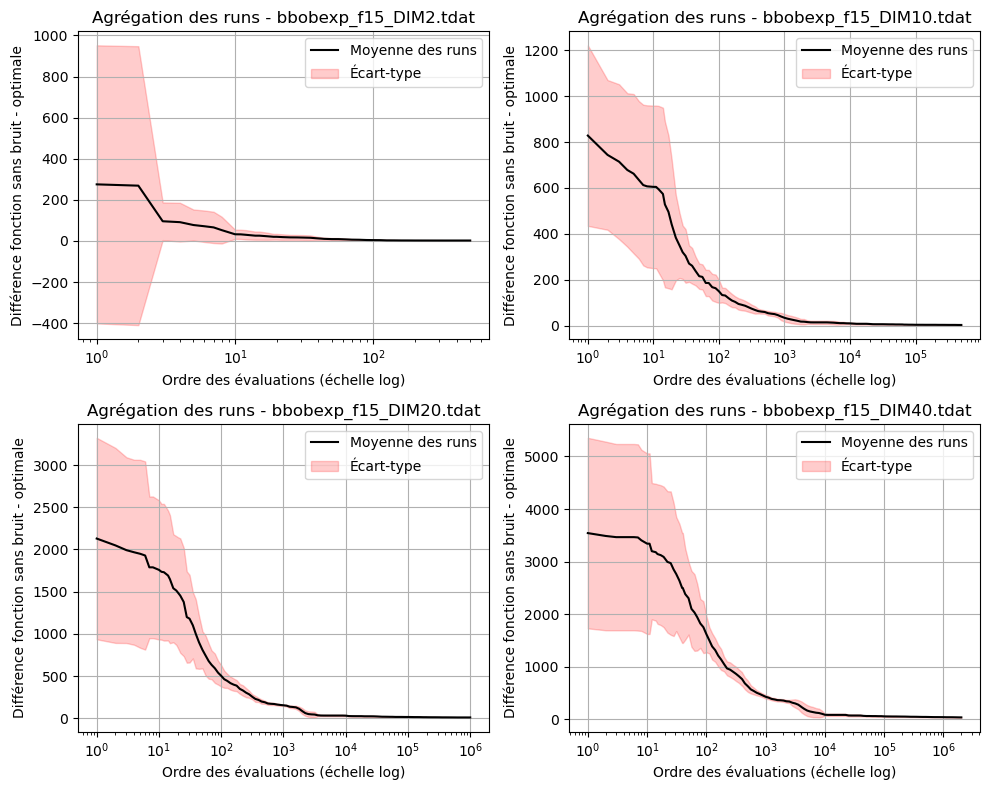

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Liste des fichiers (modifie selon tes besoins)
fichiers = [
    r"C:\Users\Hp\Desktop\Pres de la recherche\CMAES\data_f15\bbobexp_f15_DIM2.tdat",
    r"C:\Users\Hp\Desktop\Pres de la recherche\CMAES\data_f15\bbobexp_f15_DIM10.tdat",
    r"C:\Users\Hp\Desktop\Pres de la recherche\CMAES\data_f15\bbobexp_f15_DIM20.tdat",
    r"C:\Users\Hp\Desktop\Pres de la recherche\CMAES\data_f15\bbobexp_f15_DIM40.tdat",
]

# Déterminer la taille de la grille automatiquement
n = len(fichiers)
rows = int(np.ceil(n ** 0.5))  # Nombre de lignes
cols = int(np.ceil(n / rows))  # Nombre de colonnes

affichage_par_agregation(fichiers,rows,cols)

##### Analyse Type 4 : Fonction High conditionning : f15 : Rastrigin
###### L’analyse des performances de l’algorithme selon la dimension met en évidence des variations notables dans sa capacité à optimiser efficacement. En **dimension 2**, l’algorithme converge rapidement mais semble stagner, indiquant un manque de précision pour affiner l’optimisation finale. En **dimension 10**, la convergence est plus progressive, nécessitant davantage d’évaluations, mais les résultats sont plus stables avec une diminution progressive de l’écart-type. En **dimension 20**, l’erreur initiale est plus grande et l’optimisation devient plus difficile, demandant un grand nombre d’évaluations avant d’atteindre la stabilité. Enfin, en **dimension 40**, la complexité est maximale, avec une erreur initiale très élevée et une convergence extrêmement tardive. L’algorithme peine à stabiliser ses résultats, ce qui suggère qu’il devient inefficace dans les espaces de haute dimension. Dans l’ensemble, l’algorithme semble **le plus performant en dimension 10**, où il maintient un bon équilibre entre convergence et stabilité. En basse dimension, il converge trop vite sans optimisation fine, tandis qu’en haute dimension, il met trop de temps à atteindre un résultat satisfaisant. Cela montre une sensibilité de l’algorithme à la dimension du problème, avec des performances optimales dans un intervalle intermédiaire.

#### Type 5 : Multi-modal with weak global structure : f23 : Katsuura

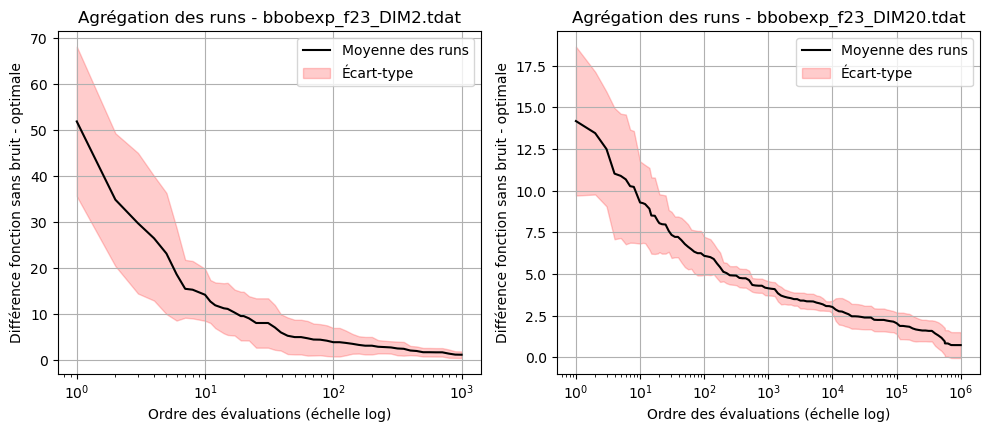

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# Liste des fichiers (modifie selon tes besoins)
fichiers = [
    r"C:\Users\Hp\Desktop\Pres de la recherche\CMAES\data_f23\bbobexp_f23_DIM2.tdat",
    r"C:\Users\Hp\Desktop\Pres de la recherche\CMAES\data_f23\bbobexp_f23_DIM20.tdat",
]

affichage_par_agregation(fichiers,2,2)


####  Analyse Type 5 : Multi-modal with weak global structure : f23 : Katsuura
###### L’analyse des performances de l’algorithme sur les dimensions 2 et 20 montre des différences notables en termes de convergence et de stabilité. En **dimension 2**, l’algorithme démarre avec une erreur relativement élevée mais converge rapidement vers une solution stable. L’écart-type est important au début, témoignant d’une variabilité entre les runs, mais il diminue progressivement. Cependant, une stagnation en fin de processus indique que l’optimisation pourrait être améliorée. En **dimension 20**, l’erreur initiale est plus faible, mais la convergence est beaucoup plus progressive, nécessitant un nombre d’évaluations bien plus important. L’optimisation est plus stable sur toute la durée, sans stagnation marquée, mais l’écart-type reste élevé sur une large partie du processus, ce qui reflète une plus grande variabilité des résultats. Globalement, l’algorithme est **plus efficace en dimension 2**, où il atteint rapidement une solution correcte avec un coût computationnel réduit. Toutefois, en haute dimension, il met plus de temps à converger mais montre une optimisation plus progressive et continue. Cela suggère que l’algorithme fonctionne bien pour des problèmes de faible dimension, mais qu’il nécessite une adaptation pour mieux gérer des espaces de recherche plus complexes et de grande dimension.

# TROIXIEME ETAPE

On choisi les deux alogrithmes suivant : 
- MLSL
- randomsearch-5
et on refait les étapes d'analyse de l'étape 1 , et l'étape 2.

## ALGORITHME MLSL

######  Affichage de chaque exécution du fichier f1 de dimension 1 dans une figure différente

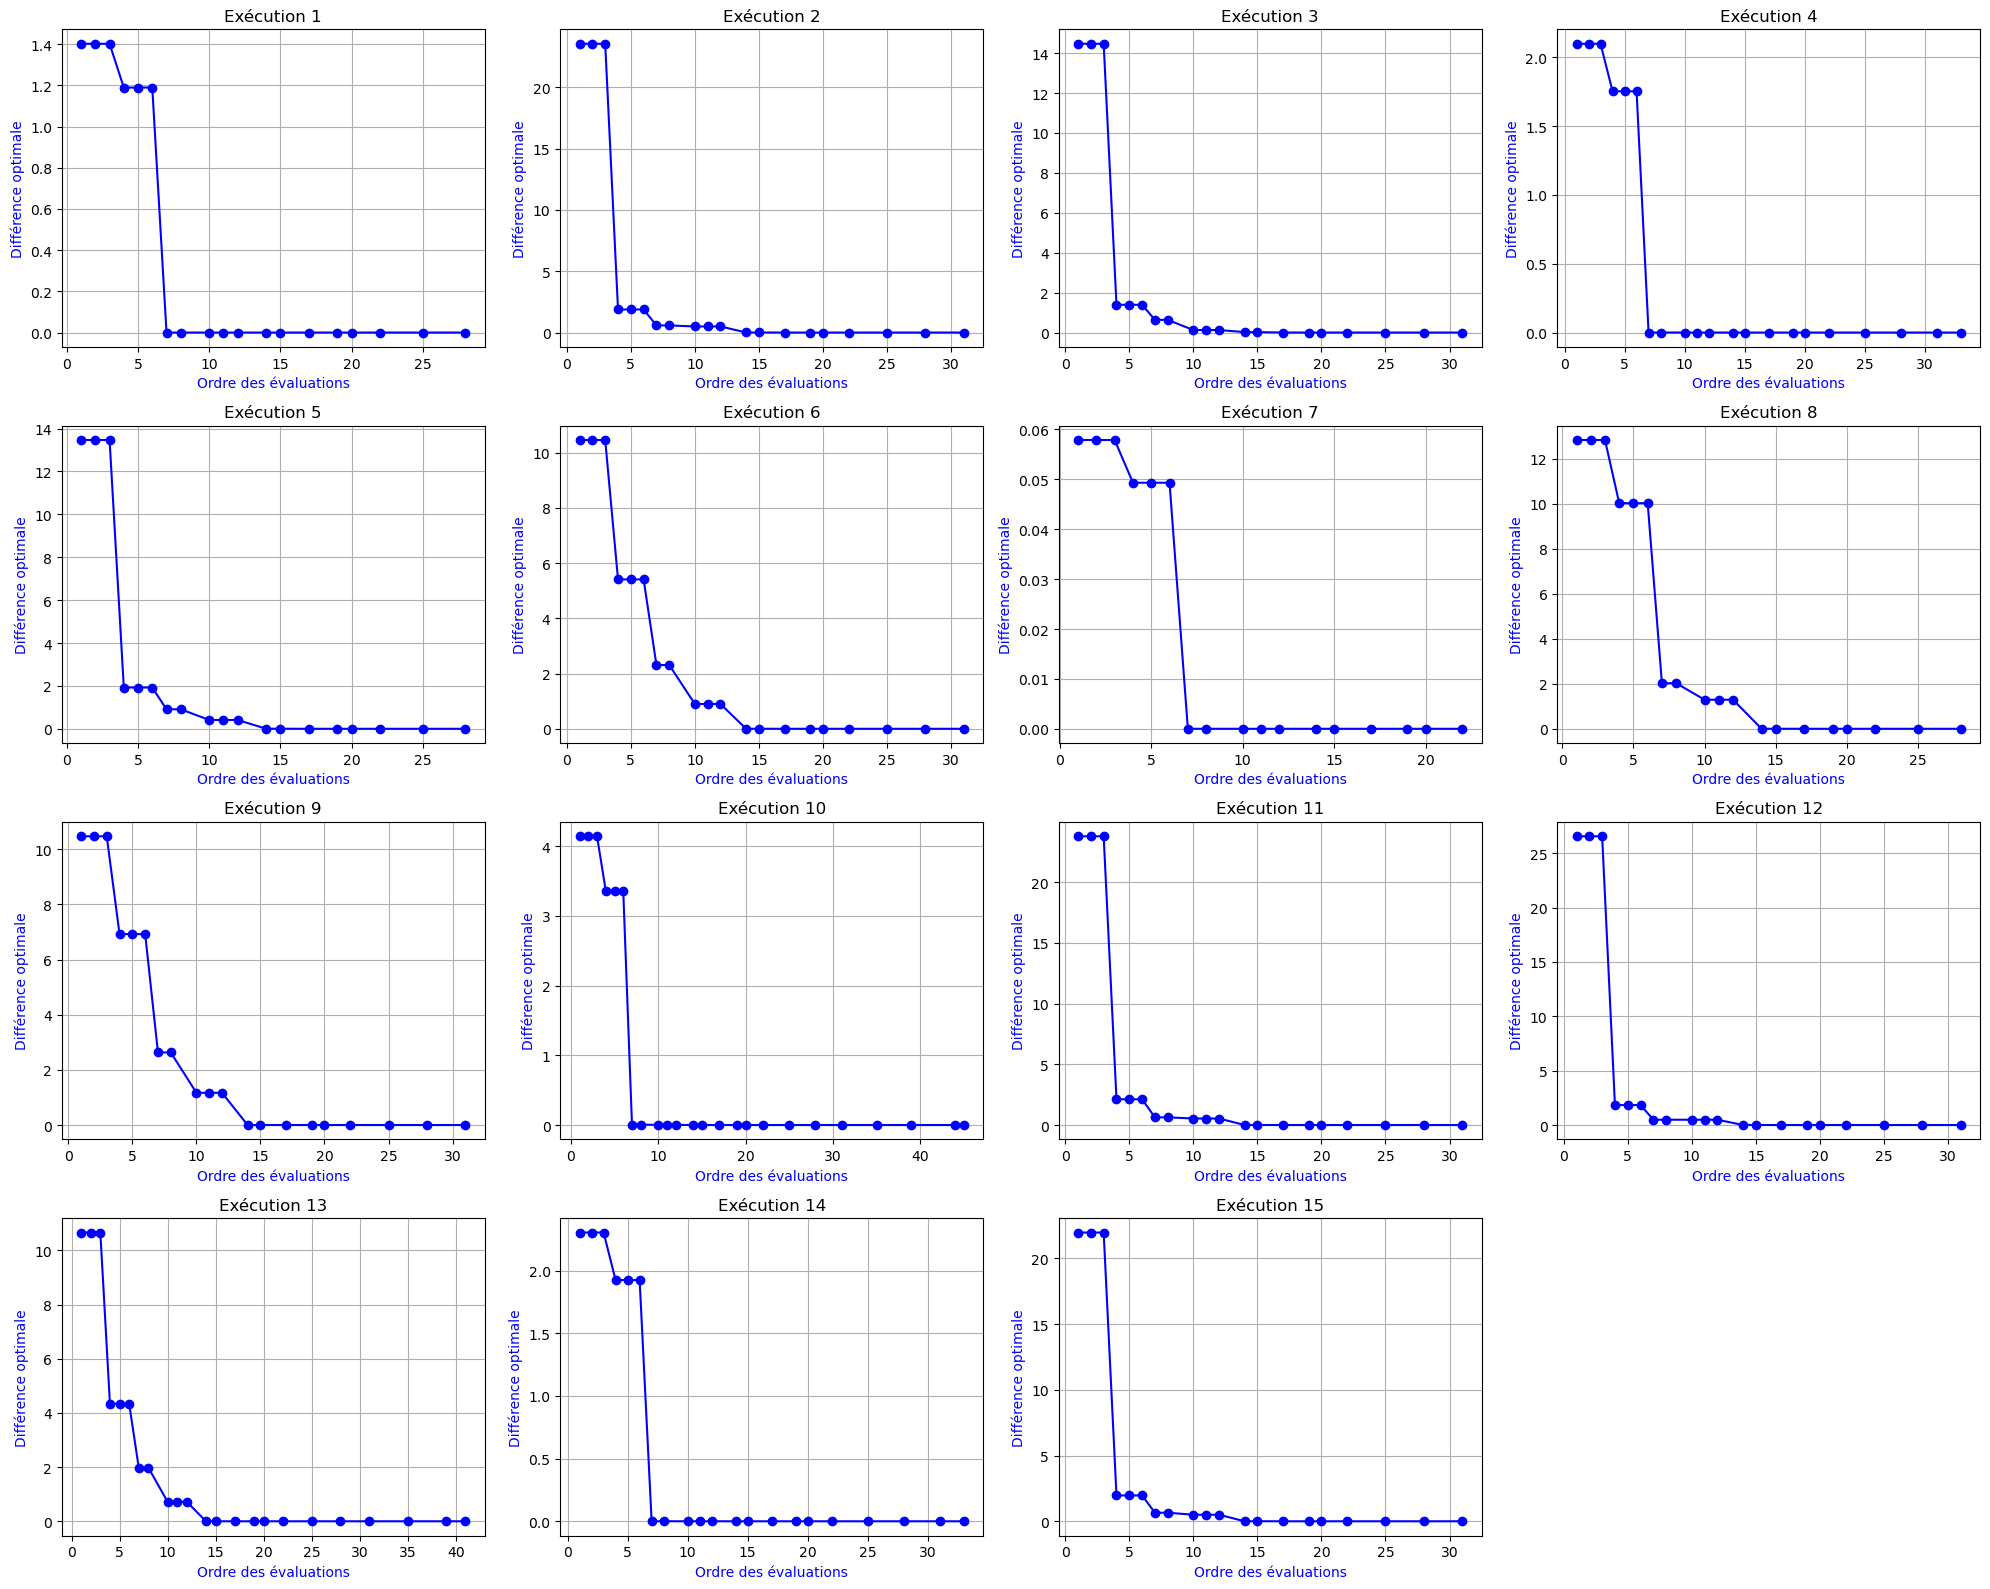

In [12]:
affichage_par_instances(r"C:\Users\Hp\Desktop\Pres de la recherche\MLSL\data_f1\bbobexp_f1_DIM2.tdat")

##### Performance de MLSQL en fonction du type de la fonction d'évaluation et la dimension du problème

###### Type 1 : Fonction separable : f5 

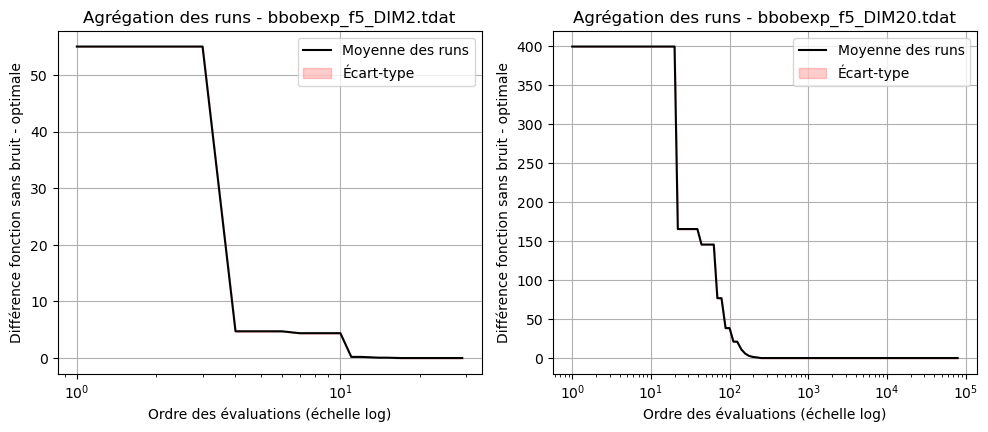

In [35]:
# Liste des fichiers (modifie selon tes besoins)
fichiers = [
    r"C:\Users\Hp\Desktop\Pres de la recherche\MLSL\data_f5\bbobexp_f5_DIM2.tdat",
    r"C:\Users\Hp\Desktop\Pres de la recherche\MLSL\data_f5\bbobexp_f5_DIM20.tdat"
]

affichage_par_agregation(fichiers,2,2)

###### Type 2 : Fonction Low or moderate conditionning : f8 : Rosenbrock original

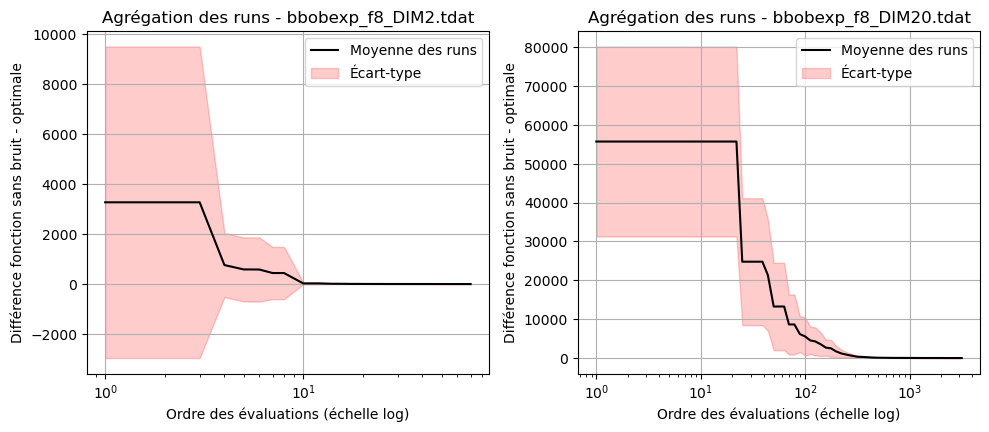

In [36]:
# Liste des fichiers (modifie selon tes besoins)
fichiers = [
    r"C:\Users\Hp\Desktop\Pres de la recherche\MLSL\data_f8\bbobexp_f8_DIM2.tdat",
    r"C:\Users\Hp\Desktop\Pres de la recherche\MLSL\data_f8\bbobexp_f8_DIM20.tdat"
]

affichage_par_agregation(fichiers,2,2)

###### Type 3 : Fonction High conditionning : f13 : Sharp ridge 

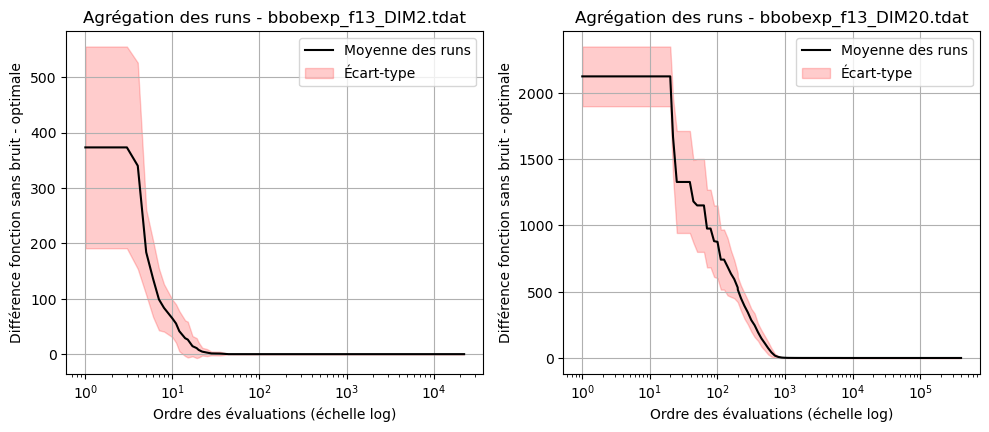

In [37]:
# Liste des fichiers (modifie selon tes besoins)
fichiers = [
    r"C:\Users\Hp\Desktop\Pres de la recherche\MLSL\data_f13\bbobexp_f13_DIM2.tdat",
    r"C:\Users\Hp\Desktop\Pres de la recherche\MLSL\data_f13\bbobexp_f13_DIM20.tdat"
]

affichage_par_agregation(fichiers,2,2)

###### Type 4 : Multi-modal with adequate global structure : f15 : Rastrigin 

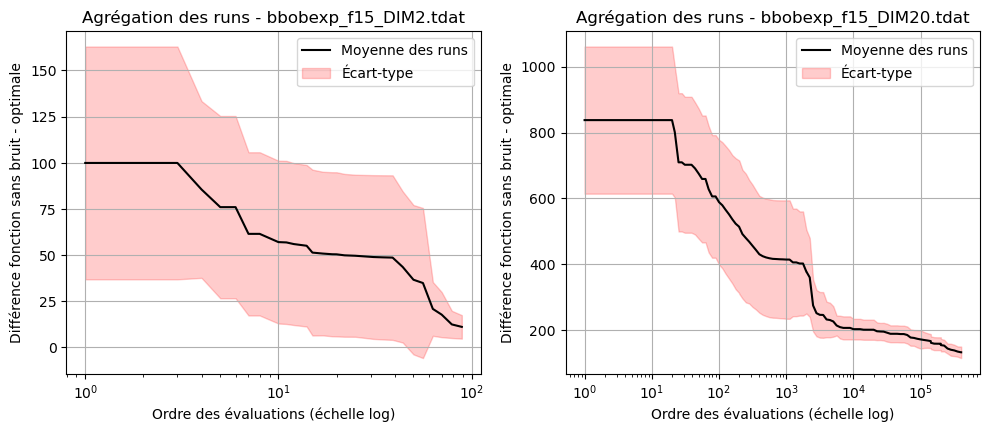

In [38]:
# Liste des fichiers (modifie selon tes besoins)
fichiers = [
    r"C:\Users\Hp\Desktop\Pres de la recherche\MLSL\data_f15\bbobexp_f15_DIM2.tdat",
    r"C:\Users\Hp\Desktop\Pres de la recherche\MLSL\data_f15\bbobexp_f15_DIM20.tdat"
]

affichage_par_agregation(fichiers,2,2)

###### Type 5 : Multi-modal with weak global structure : f23 : Katsuura

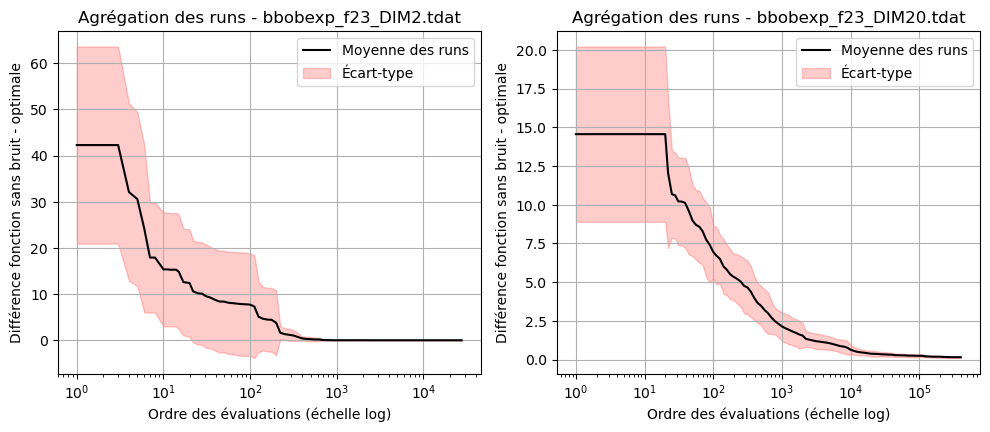

In [39]:
# Liste des fichiers (modifie selon tes besoins)
fichiers = [
    r"C:\Users\Hp\Desktop\Pres de la recherche\MLSL\data_f23\bbobexp_f23_DIM2.tdat",
    r"C:\Users\Hp\Desktop\Pres de la recherche\MLSL\data_f23\bbobexp_f23_DIM20.tdat"
]

affichage_par_agregation(fichiers,2,2)

## ALGORITHME RANDOMFOREST-5

######  Affichage de chaque exécution du fichier f1 de dimension 1 dans une figure différente

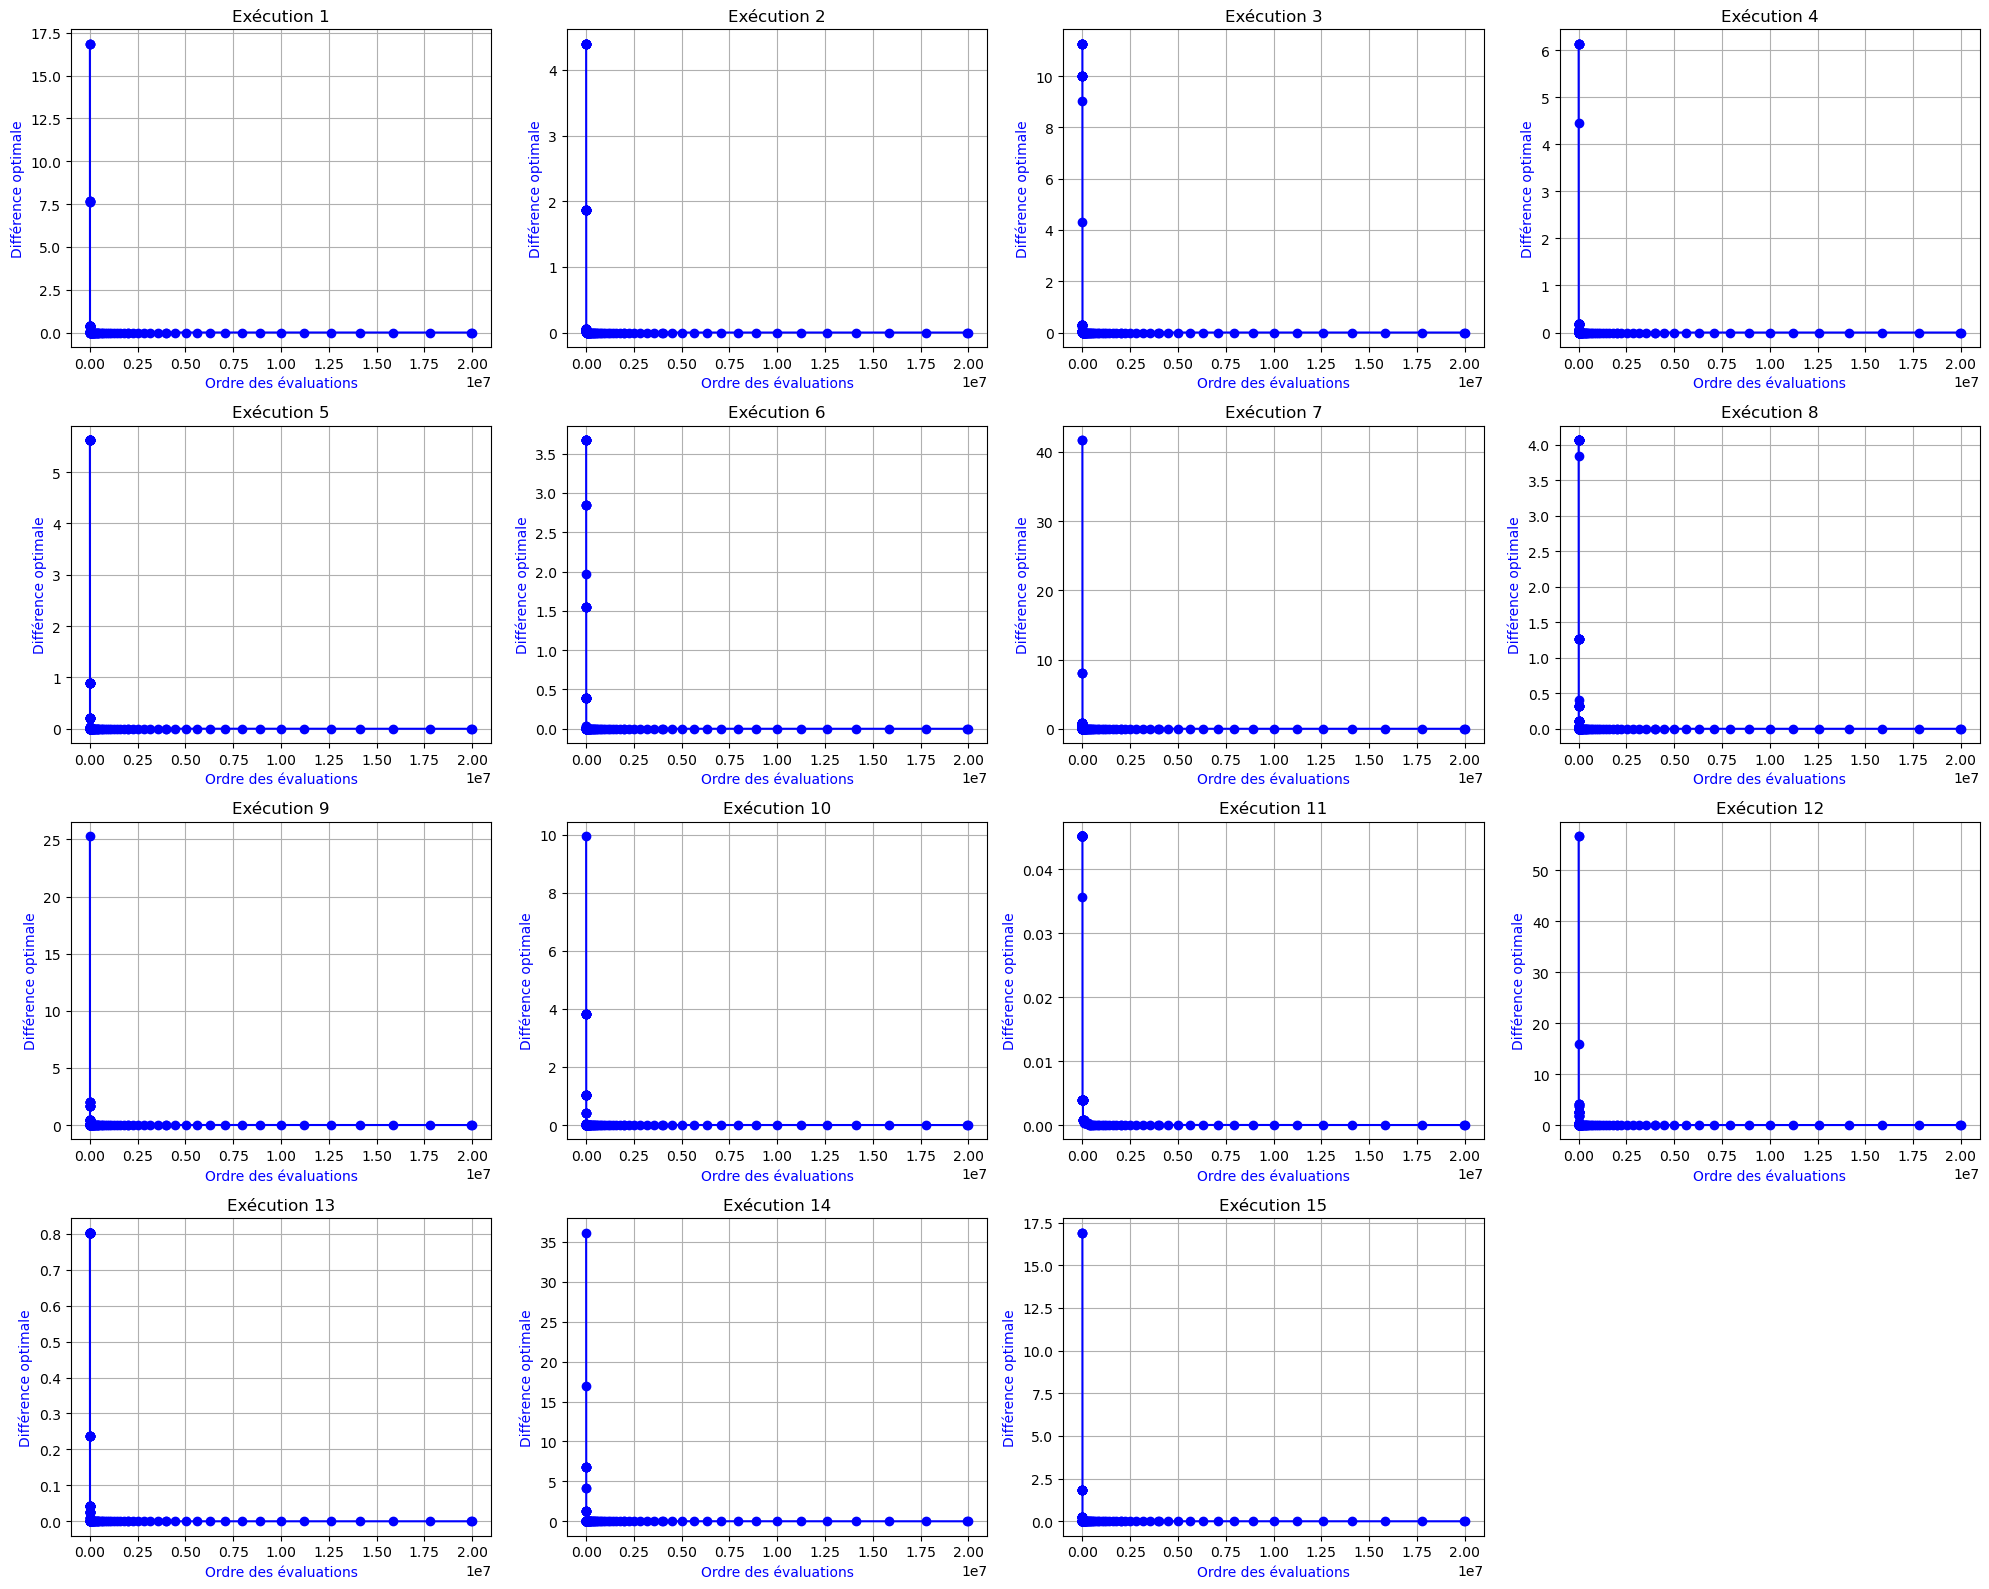

In [21]:
affichage_par_instances(r"C:\Users\Hp\Desktop\Pres de la recherche\RANDOMSEARCH-5-1e7D-Brockhoff\data_f1\bbobexp_f1_DIM2_i1.tdat")

###### Type 1 : Fonction separable : f5 

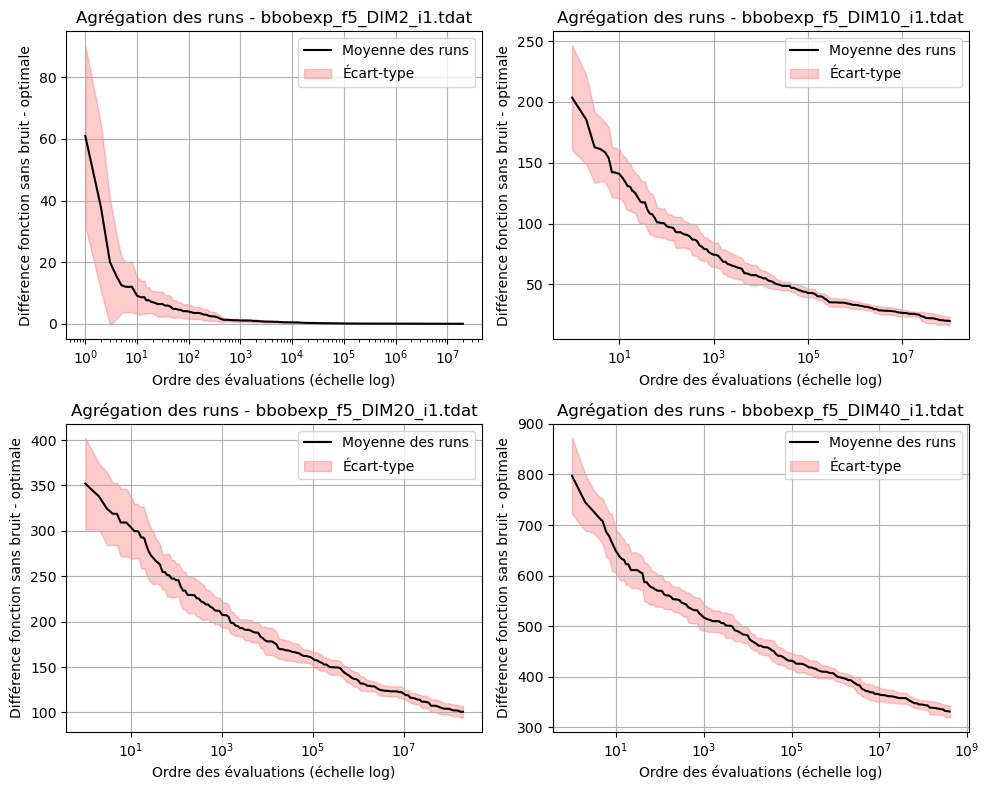

In [40]:
# Liste des fichiers (modifie selon tes besoins)
fichiers = [
    r"C:\Users\Hp\Desktop\Pres de la recherche\RANDOMSEARCH-5-1e7D-Brockhoff\data_f5\bbobexp_f5_DIM2_i1.tdat",
    r"C:\Users\Hp\Desktop\Pres de la recherche\RANDOMSEARCH-5-1e7D-Brockhoff\data_f5\bbobexp_f5_DIM10_i1.tdat",
    r"C:\Users\Hp\Desktop\Pres de la recherche\RANDOMSEARCH-5-1e7D-Brockhoff\data_f5\bbobexp_f5_DIM20_i1.tdat",
    r"C:\Users\Hp\Desktop\Pres de la recherche\RANDOMSEARCH-5-1e7D-Brockhoff\data_f5\bbobexp_f5_DIM40_i1.tdat"
]

# Déterminer la taille de la grille automatiquement
n = len(fichiers)
rows = 2  # Nombre de lignes
cols = 2  # Nombre de colonnes

affichage_par_agregation(fichiers,rows,cols)

###### Type 2 : Fonction Low or moderate conditionning : f8 : Rosenbrock original

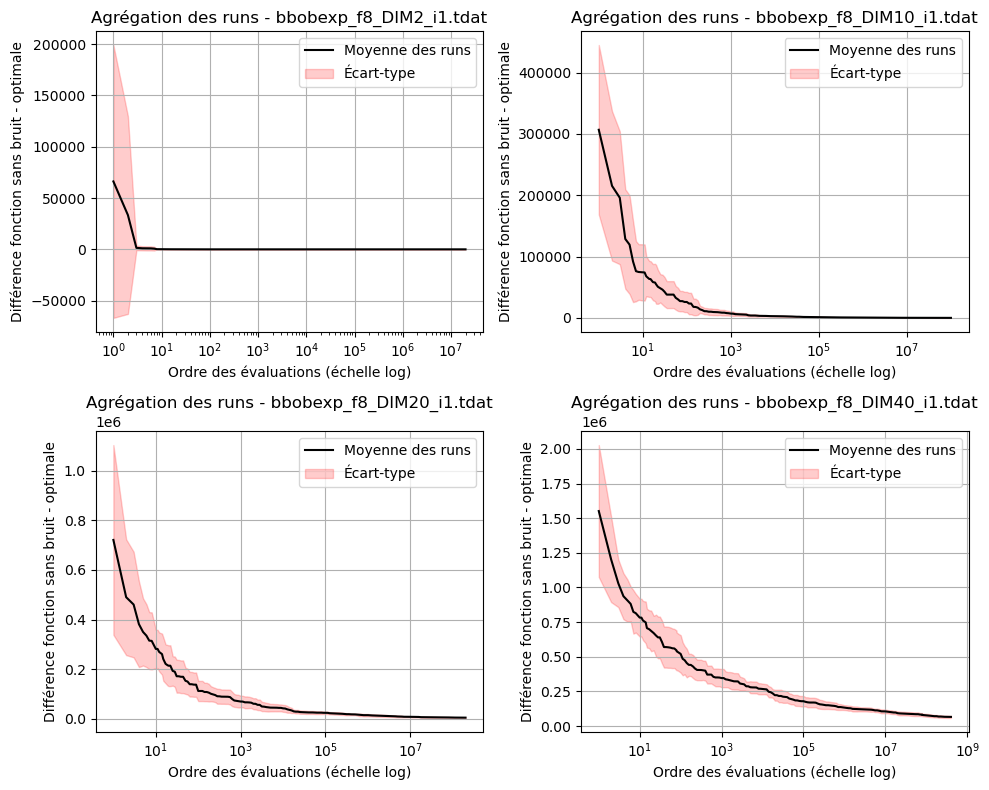

In [41]:
# Liste des fichiers (modifie selon tes besoins)
fichiers = [
    r"C:\Users\Hp\Desktop\Pres de la recherche\RANDOMSEARCH-5-1e7D-Brockhoff\data_f8\bbobexp_f8_DIM2_i1.tdat",
    r"C:\Users\Hp\Desktop\Pres de la recherche\RANDOMSEARCH-5-1e7D-Brockhoff\data_f8\bbobexp_f8_DIM10_i1.tdat",
    r"C:\Users\Hp\Desktop\Pres de la recherche\RANDOMSEARCH-5-1e7D-Brockhoff\data_f8\bbobexp_f8_DIM20_i1.tdat",
    r"C:\Users\Hp\Desktop\Pres de la recherche\RANDOMSEARCH-5-1e7D-Brockhoff\data_f8\bbobexp_f8_DIM40_i1.tdat"
]

# Déterminer la taille de la grille automatiquement
n = len(fichiers)
rows = 2  # Nombre de lignes
cols = 2  # Nombre de colonnes

affichage_par_agregation(fichiers,rows,cols)

### Analyse de l'agrégation des runs de la fonction RosenBrock pour la dimension 40


#### **Analyse de la performance**
- **Phase initiale (gauche du graphe, faibles évaluations)** : L’algorithme améliore rapidement la solution initiale avec une forte réduction de l’erreur.
- **Phase intermédiaire (milieu du graphe, \(10^3\) à \(10^6\) évaluations)** : La courbe continue de diminuer, mais plus lentement, ce qui suggère que l’algorithme affine sa solution.
- **Phase finale (droite du graphe, \(10^7\) évaluations et plus)** : La courbe devient presque plate, indiquant une convergence vers une valeur stable (minimum local ou global de la fonction).

#### **Comparaison avec la nature de f8**
- La fonction de Rosenbrock est connue pour être difficile à optimiser à cause de sa vallée étroite et incurvée qui mène au minimum global.
- L’algorithme Random Forest semble bien réduire l’erreur au fil des itérations, mais il pourrait être limité dans la convergence finale à cause de la difficulté de la fonction.
- L'écart-type initial élevé suggère que la performance varie selon les runs, ce qui peut être dû à l’exploration aléatoire de l’algorithme.

### Comparaison entre les agrégations des runs de la fonction RosenBrock pour les dimension 2 , 10 , 20 et 40

On remarque plus la dimension augmente plus l'algorithme devient moins performant : 
- Pour une dimension égale à 2 , il converge vers \(10^0.5\)
- Pour une dimension égale à 10 , il converge vers \(10^3\)


###### Type 3 : Fonction High conditionning : f13 : Sharp ridge 

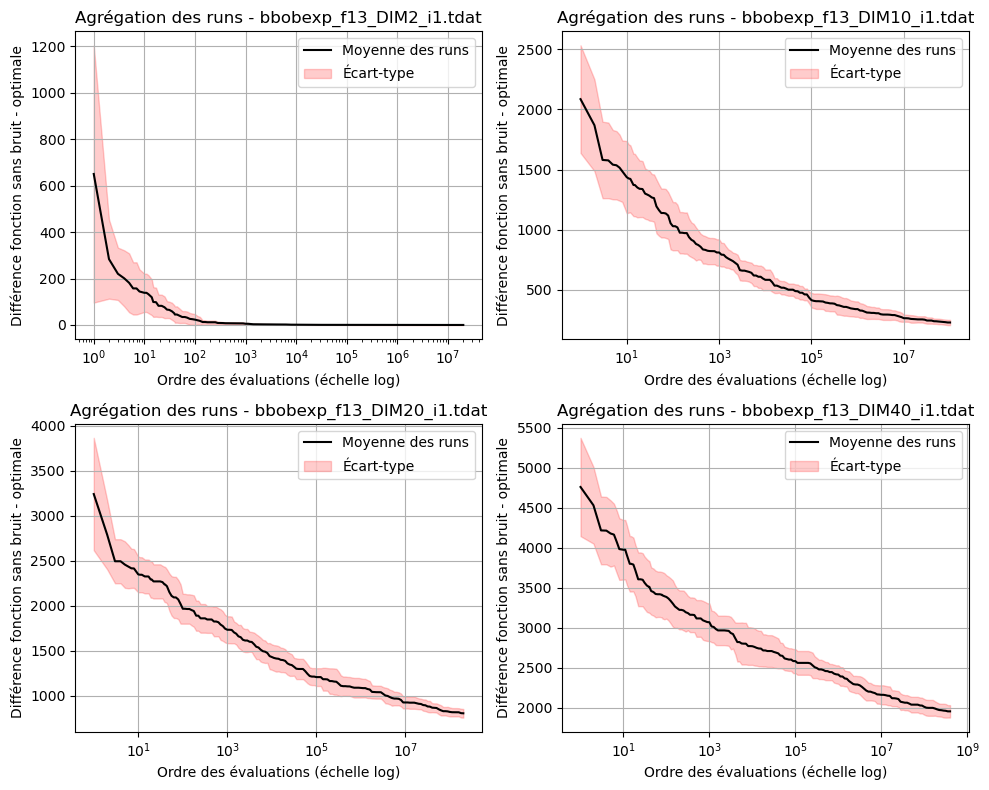

In [42]:
# Liste des fichiers (modifie selon tes besoins)
fichiers = [
    r"C:\Users\Hp\Desktop\Pres de la recherche\RANDOMSEARCH-5-1e7D-Brockhoff\data_f13\bbobexp_f13_DIM2_i1.tdat",
    r"C:\Users\Hp\Desktop\Pres de la recherche\RANDOMSEARCH-5-1e7D-Brockhoff\data_f13\bbobexp_f13_DIM10_i1.tdat",
    r"C:\Users\Hp\Desktop\Pres de la recherche\RANDOMSEARCH-5-1e7D-Brockhoff\data_f13\bbobexp_f13_DIM20_i1.tdat",
    r"C:\Users\Hp\Desktop\Pres de la recherche\RANDOMSEARCH-5-1e7D-Brockhoff\data_f13\bbobexp_f13_DIM40_i1.tdat"
]

# Déterminer la taille de la grille automatiquement
n = len(fichiers)
rows = 2  # Nombre de lignes
cols = 2  # Nombre de colonnes

affichage_par_agregation(fichiers,rows,cols)

###### Type 4 : Multi-modal with adequate global structure : f15 : Rastrigin 

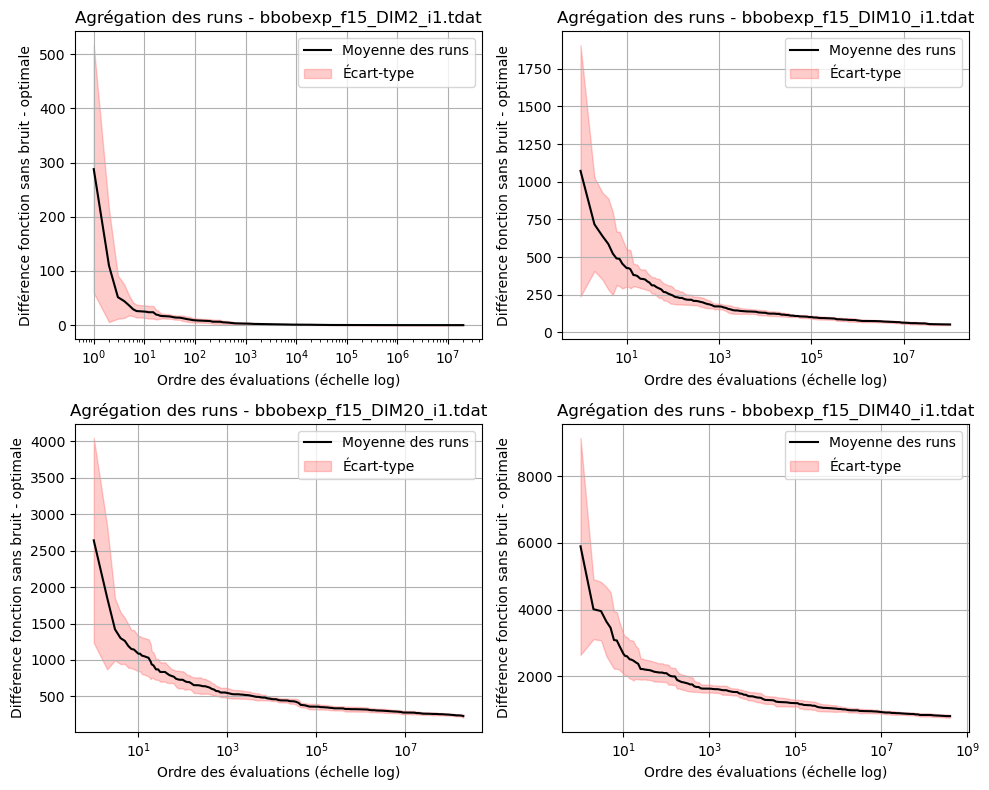

In [43]:
# Liste des fichiers (modifie selon tes besoins)
fichiers = [
    r"C:\Users\Hp\Desktop\Pres de la recherche\RANDOMSEARCH-5-1e7D-Brockhoff\data_f15\bbobexp_f15_DIM2_i1.tdat",
    r"C:\Users\Hp\Desktop\Pres de la recherche\RANDOMSEARCH-5-1e7D-Brockhoff\data_f15\bbobexp_f15_DIM10_i1.tdat",
    r"C:\Users\Hp\Desktop\Pres de la recherche\RANDOMSEARCH-5-1e7D-Brockhoff\data_f15\bbobexp_f15_DIM20_i1.tdat",
    r"C:\Users\Hp\Desktop\Pres de la recherche\RANDOMSEARCH-5-1e7D-Brockhoff\data_f15\bbobexp_f15_DIM40_i1.tdat"
]

# Déterminer la taille de la grille automatiquement
n = len(fichiers)
rows = 2  # Nombre de lignes
cols = 2  # Nombre de colonnes

affichage_par_agregation(fichiers,rows,cols)

###### Type 5 : Multi-modal with weak global structure : f23 : Katsuura

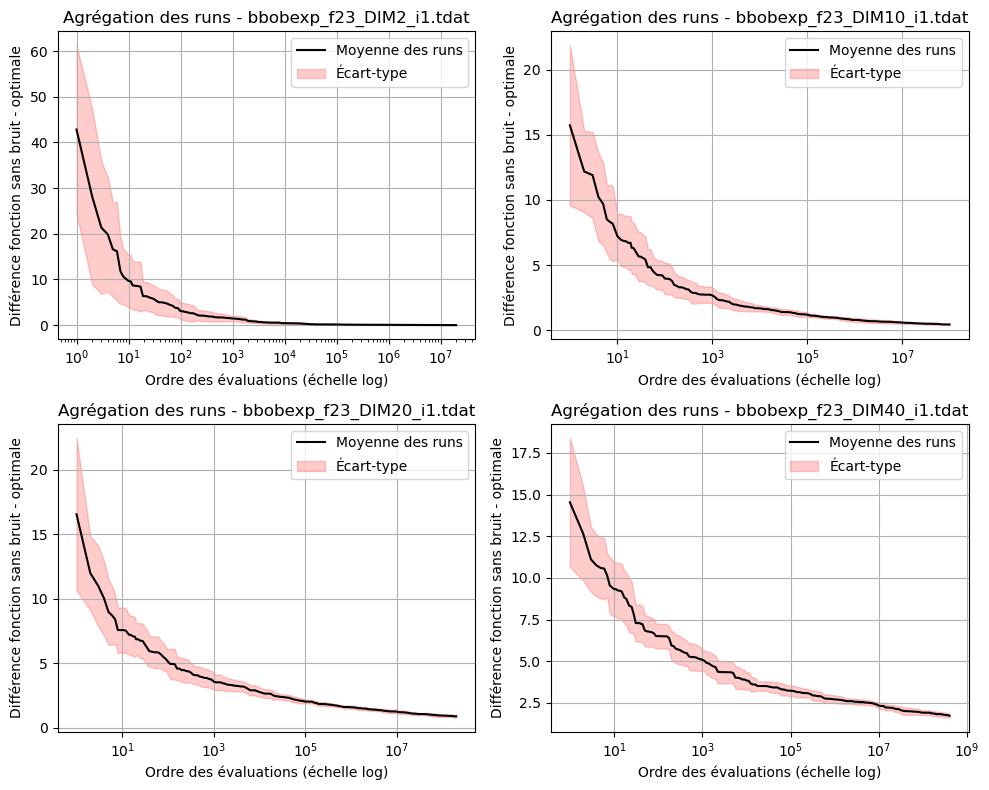

In [44]:
# Liste des fichiers (modifie selon tes besoins)
fichiers = [
    r"C:\Users\Hp\Desktop\Pres de la recherche\RANDOMSEARCH-5-1e7D-Brockhoff\data_f23\bbobexp_f23_DIM2_i1.tdat",
    r"C:\Users\Hp\Desktop\Pres de la recherche\RANDOMSEARCH-5-1e7D-Brockhoff\data_f23\bbobexp_f23_DIM10_i1.tdat",
    r"C:\Users\Hp\Desktop\Pres de la recherche\RANDOMSEARCH-5-1e7D-Brockhoff\data_f23\bbobexp_f23_DIM20_i1.tdat",
    r"C:\Users\Hp\Desktop\Pres de la recherche\RANDOMSEARCH-5-1e7D-Brockhoff\data_f23\bbobexp_f23_DIM40_i1.tdat"
]

# Déterminer la taille de la grille automatiquement
n = len(fichiers)
rows = 2  # Nombre de lignes
cols = 2  # Nombre de colonnes

affichage_par_agregation(fichiers,rows,cols)